## Problem Statement

What are the things that a potential home buyer considers before purchasing a house? The location, the size of the property, vicinity to offices, schools, parks, restaurants, hospitals or the stereotypical white picket fence? What about the most important factor — the price?

Now with the lingering impact of demonetization, the enforcement of the Real Estate (Regulation and Development) Act (RERA), and the lack of trust in property developers in the city, housing units sold across India in 2017 dropped by 7 percent. In fact, the property prices in Bengaluru fell by almost 5 percent in the second half of 2017, said a study published by property consultancy Knight Frank. For example, for a potential homeowner, over 9,000 apartment projects and flats for sale are available in the range of ₹42-52 lakh, followed by over 7,100 apartments that are in the ₹52-62 lakh budget segment, says a report by property website Makaan. According to the study, there are over 5,000 projects in the ₹15-25 lakh budget segment followed by those in the ₹34-43 lakh budget category.

Buying a home, especially in a city like Bengaluru, is a tricky choice. While the major factors are usually the same for all metros, there are others to be considered for the Silicon Valley of India. With its help millennial crowd, vibrant culture, great climate and a slew of job opportunities, it is difficult to ascertain the price of a house in Bengaluru.

In [1]:
## Incuding all necessary library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
## Reading the file

df = pd.read_csv("Bengaluru_House_Data.csv")
df.head(5)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
## Column information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
area_type       13320 non-null object
availability    13320 non-null object
location        13319 non-null object
size            13304 non-null object
society         7818 non-null object
total_sqft      13320 non-null object
bath            13247 non-null float64
balcony         12711 non-null float64
price           13320 non-null float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


## Data Preprocessing

+ Finding null values and fill with respective values 
+ preprocessing the data

In [4]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [5]:
for feature in df.columns:
    if df[feature].isnull().sum() > 1:
        print("{} Feature has {}% Missing values ".format(feature,round(df[feature].isnull().mean()*100,1)))

size Feature has 0.1% Missing values 
society Feature has 41.3% Missing values 
bath Feature has 0.5% Missing values 
balcony Feature has 4.6% Missing values 


In [6]:
## Copy the data from orginal DF to duplicate DF1

df1 = df.copy()
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [7]:
## Update the null vales with respective value in society

df1['society'].fillna("Info Not available",inplace = True)


In [8]:
df1['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [9]:
## We have 0.1% null values in size feature, so we can update with respective values

df1['size'].fillna('0',inplace = True)

In [10]:
## Update the null vales with respective value in bathroom feature

df1['bath'].fillna(1.0,inplace = True)

In [11]:
## Update the null vales with respective value in balcony feature

df1['balcony'].fillna(0.0,inplace = True)

In [12]:
## Find out varies values in total_sqft feature

def is_float(x):
    try:
        float(x)
    except:
        return False
    return True


df1[~df1['total_sqft'].apply(is_float)]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
30,Super built-up Area,19-Dec,Yelahanka,4 BHK,LedorSa,2100 - 2850,4.0,0.0,186.000
56,Built-up Area,20-Feb,Devanahalli,4 Bedroom,BrereAt,3010 - 3410,1.0,0.0,192.000
81,Built-up Area,18-Oct,Hennur Road,4 Bedroom,Gollela,2957 - 3450,1.0,0.0,224.500
122,Super built-up Area,18-Mar,Hebbal,4 BHK,SNontle,3067 - 8156,4.0,0.0,477.000
137,Super built-up Area,19-Mar,8th Phase JP Nagar,2 BHK,Vaarech,1042 - 1105,2.0,0.0,54.005
...,...,...,...,...,...,...,...,...,...
12990,Super built-up Area,18-May,Talaghattapura,3 BHK,Sodgere,1804 - 2273,3.0,0.0,122.000
13059,Super built-up Area,Ready To Move,Harlur,2 BHK,Shodsir,1200 - 1470,2.0,0.0,72.760
13240,Super built-up Area,Ready To Move,Devanahalli,1 BHK,Pardsri,1020 - 1130,1.0,0.0,52.570
13265,Super built-up Area,20-Sep,Hoodi,2 BHK,Ranuetz,1133 - 1384,2.0,0.0,59.135


We have range value and some other values as well like Sq. Yard, Sq. meter. So I'm going to take mean value for the range category and ignore the remaining data like Sq. Yard.

In [13]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2 ## take a mean value for range value
    try:
        return float(x) ## Directly return float value if it is same
    except:
        return None ## otherwise make Null

In [14]:
df1.total_sqft.isnull().sum()

0

In [15]:
df1.total_sqft = df1.total_sqft.apply(convert_sqft_to_num)


In [16]:
df1.total_sqft.isnull().sum()

46

In [17]:
df1.total_sqft.dropna(axis='index',inplace=True)

In [18]:
df1.total_sqft.isnull().sum()

0

In [19]:
df1

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600.0,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,Info Not available,1440.0,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521.0,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,Info Not available,1200.0,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453.0,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,Info Not available,3600.0,5.0,0.0,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141.0,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689.0,4.0,1.0,488.00


+ Change correct data type to the features 

In [20]:

df1 = df1.astype({'bath':np.int32, 'balcony':np.int32})


In [21]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13320 entries, 0 to 13319
Data columns (total 9 columns):
area_type       13320 non-null object
availability    13320 non-null object
location        13319 non-null object
size            13320 non-null object
society         13320 non-null object
total_sqft      13274 non-null float64
bath            13320 non-null int32
balcony         13320 non-null int32
price           13320 non-null float64
dtypes: float64(2), int32(2), object(5)
memory usage: 936.6+ KB


## Feature Engineering

+ Add the new column to identify the exact BHK value.

In [22]:
## Creating new size column which can only have numerical value alone

df1['bhk'] = df1['size'].apply(lambda x : int(x.split()[0]))
df1

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056.0,2,1,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600.0,5,3,120.00,4
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,Info Not available,1440.0,2,3,62.00,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521.0,3,1,95.00,3
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,Info Not available,1200.0,2,1,51.00,2
...,...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453.0,4,0,231.00,5
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,Info Not available,3600.0,5,0,400.00,4
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141.0,2,1,60.00,2
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689.0,4,1,488.00,4


In [23]:
## Creating new price_per_sqr column which can evoluate the price per Sqr feet

df1['price_per_sqr'] = round(df1['price'] * 100000 / df1['total_sqft'],2) 

df1

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,bhk,price_per_sqr
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056.0,2,1,39.07,2,3699.81
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600.0,5,3,120.00,4,4615.38
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,Info Not available,1440.0,2,3,62.00,3,4305.56
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521.0,3,1,95.00,3,6245.89
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,Info Not available,1200.0,2,1,51.00,2,4250.00
...,...,...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453.0,4,0,231.00,5,6689.83
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,Info Not available,3600.0,5,0,400.00,4,11111.11
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141.0,2,1,60.00,2,5258.55
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689.0,4,1,488.00,4,10407.34


In [24]:
## Finding unique location

df1.location.unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [25]:
len(df1.location.unique())

1306

Total 1306 unique location means it will make our model more complecate. So we can replace "Others" to location, which has very less data point( > below 10)

+ Finding number of locaton has count value less then 10

In [26]:
## Locaton count value pair

location_stats = df1['location'].value_counts() 
location_stats

Whitefield                                  540
Sarjapur  Road                              399
Electronic City                             302
Kanakpura Road                              273
Thanisandra                                 234
                                           ... 
Near Electronic City,                         1
Nirman Layout                                 1
Viswapriyanagar.begur Road.bommanahalli.      1
T R Mill Road                                 1
Kengeri Satellite Town ( BDA SITE)            1
Name: location, Length: 1305, dtype: int64

In [27]:
location_stats.values.sum()

13319

In [28]:
## Locaton data point count > 10

len(location_stats[location_stats > 10] )

241

In [29]:
## Locaton data point count < 10

len(location_stats[location_stats <= 10])

1064

+ Dimensionality Reduction

In [30]:
## Identify the location which has below 10 data point

below_10_dp = location_stats[location_stats <= 10]
below_10_dp

Kalkere                                     10
Nagadevanahalli                             10
Dairy Circle                                10
Basapura                                    10
BTM 1st Stage                               10
                                            ..
Near Electronic City,                        1
Nirman Layout                                1
Viswapriyanagar.begur Road.bommanahalli.     1
T R Mill Road                                1
Kengeri Satellite Town ( BDA SITE)           1
Name: location, Length: 1064, dtype: int64

In [31]:
## Replace the location name by others which is present in "below_10_dp" list

df1['location'] = df1['location'].apply(lambda x : 'Others' if x in below_10_dp else x)
df1

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,bhk,price_per_sqr
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056.0,2,1,39.07,2,3699.81
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600.0,5,3,120.00,4,4615.38
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,Info Not available,1440.0,2,3,62.00,3,4305.56
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521.0,3,1,95.00,3,6245.89
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,Info Not available,1200.0,2,1,51.00,2,4250.00
...,...,...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453.0,4,0,231.00,5,6689.83
13316,Super built-up Area,Ready To Move,Others,4 BHK,Info Not available,3600.0,5,0,400.00,4,11111.11
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141.0,2,1,60.00,2,5258.55
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689.0,4,1,488.00,4,10407.34


In [32]:
len(df1.location.unique())

243

## Outlier Removal Using Business Logic

Each bedroom will have min 300 sqft, If it is less then that then we can say such a case outliers 

In [33]:
df2 = df1.copy()

In [34]:
df2[(df2.total_sqft/df2.bhk) < 300].head()   

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,bhk,price_per_sqr
9,Plot Area,Ready To Move,Others,6 Bedroom,Info Not available,1020.0,6,0,370.0,6,36274.51
45,Plot Area,Ready To Move,HSR Layout,8 Bedroom,Info Not available,600.0,9,0,200.0,8,33333.33
58,Plot Area,Ready To Move,Murugeshpalya,6 Bedroom,Info Not available,1407.0,4,1,150.0,6,10660.98
68,Plot Area,Ready To Move,Others,8 Bedroom,Info Not available,1350.0,7,0,85.0,8,6296.30
70,Plot Area,Ready To Move,Others,3 Bedroom,Info Not available,500.0,3,2,100.0,3,20000.00


In [35]:
l = len(df2[df2.total_sqft/df2.bhk<300])
print("Around {}% of records become otliers with this condition".format(round(l/len(df) * 100,2)))

Around 5.59% of records become otliers with this condition


In [36]:
df2.shape

(13320, 11)

In [37]:
df3 = df2[~(df2.total_sqft/df2.bhk < 300)]
df3.shape

(12576, 11)

## Outlier Removal Using Standard Deviation and Mean

In [38]:
df3.price_per_sqr.describe()

count     12530.000000
mean       6303.979369
std        4162.238008
min         267.830000
25%        4210.530000
50%        5294.120000
75%        6916.670000
max      176470.590000
Name: price_per_sqr, dtype: float64

+ Based on location apply SD & mean to reduce the outliers

In [39]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqr)
        st = np.std(subdf.price_per_sqr)
        reduced_df = subdf[(subdf.price_per_sqr>(m-st)) & (subdf.price_per_sqr<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df4 = remove_pps_outliers(df3)
df4.shape

(10303, 11)

+ Let's check if for a given location how does the 2 BHK and 3 BHK property prices look like

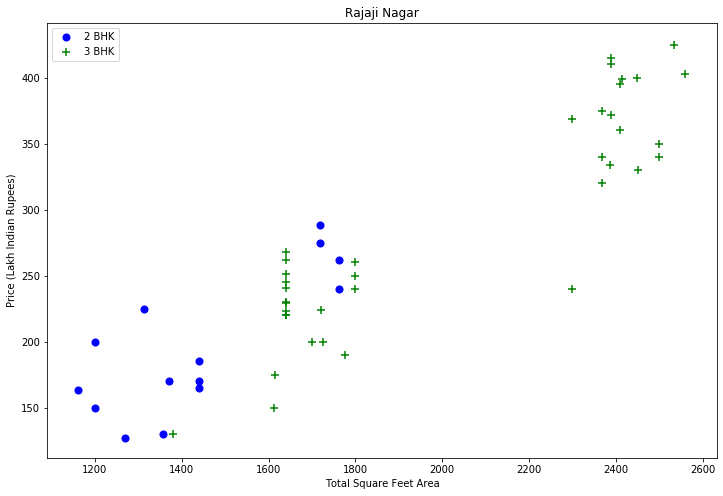

In [40]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    fig = plt.figure(figsize=(12,8))
    fig, plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    fig, plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df4,"Rajaji Nagar") ## Display only for Rajaji nagar

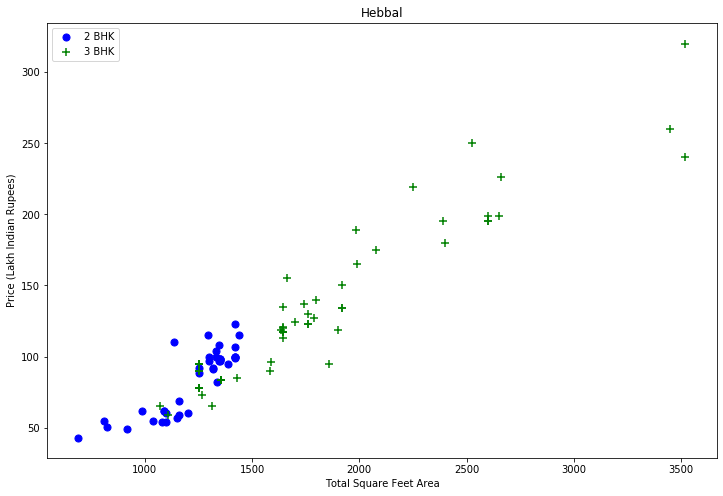

In [41]:
## For Hebbal

plot_scatter_chart(df4,"Hebbal")

+ Now we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment

In [42]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqr),
                'std': np.std(bhk_df.price_per_sqr),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqr<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df5 = remove_bhk_outliers(df4)
df5.shape

(7374, 11)

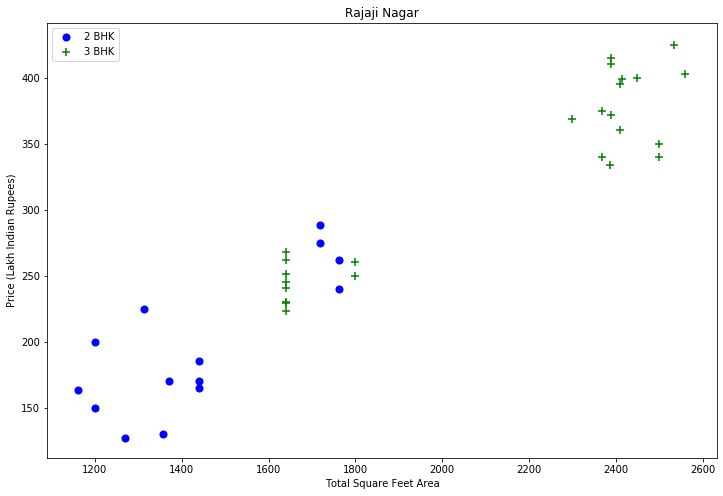

In [43]:
plot_scatter_chart(df5,"Rajaji Nagar")

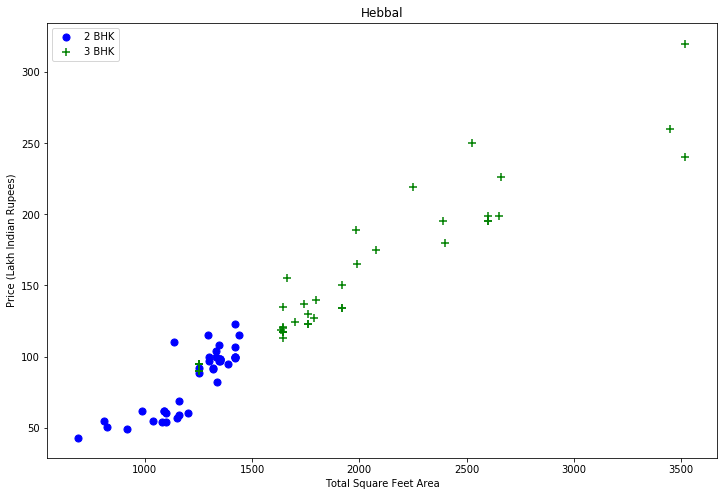

In [44]:
plot_scatter_chart(df5,"Hebbal")

Text(0.5, 1.0, 'Price per sqft distribution')

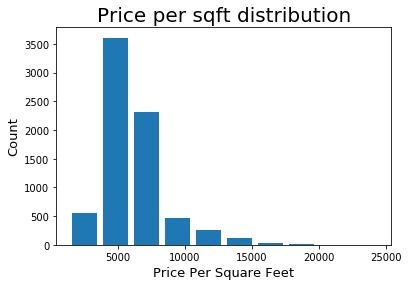

In [45]:
import matplotlib

plt.hist(df5.price_per_sqr,rwidth=0.8)
plt.xlabel("Price Per Square Feet",size = 13)
plt.ylabel("Count", size = 13)
plt.title("Price per sqft distribution", size = 20)

+ Outlier Removal Using Bathrooms Feature

In [46]:
df5.bath.unique()

array([ 2,  3,  4,  5,  8,  1,  6,  7,  9, 12, 16, 13], dtype=int64)

12, 13 & 16 are abnormal values, So we need to find the outliers

In [47]:
df5[df5.bath>10]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,bhk,price_per_sqr
5307,Super built-up Area,Ready To Move,Neeladri Nagar,10 BHK,Info Not available,4000.0,12,0,160.0,10,4000.00
5961,Super built-up Area,Ready To Move,Others,10 BHK,Info Not available,12000.0,12,0,525.0,10,4375.00
6050,Super built-up Area,Ready To Move,Others,16 BHK,Info Not available,10000.0,16,0,550.0,16,5500.00
6789,Super built-up Area,Ready To Move,Others,11 BHK,Info Not available,6000.0,12,0,150.0,11,2500.00
7122,Super built-up Area,Ready To Move,Others,13 BHK,Info Not available,5425.0,13,0,275.0,13,5069.12


In [48]:
## Bedroom < bathroom
l = len(df5[df5.bath > df5.bhk + 1])
bath_bed = df5[df5.bath > df5.bhk + 1]
bath_bed

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,bhk,price_per_sqr
49,Plot Area,Ready To Move,2nd Stage Nagarbhavi,6 Bedroom,Info Not available,3000.0,8,3,451.0,6,15033.33
50,Plot Area,Ready To Move,2nd Stage Nagarbhavi,6 Bedroom,Info Not available,2400.0,8,3,450.0,6,18750.00
542,Super built-up Area,18-Jul,Arekere,4 BHK,RRnumn,2710.0,6,2,142.0,4,5239.85
592,Plot Area,Ready To Move,BTM 2nd Stage,3 Bedroom,Info Not available,1260.0,5,1,185.0,3,14682.54
722,Super built-up Area,Ready To Move,Banashankari,3 BHK,PrdgeSo,2582.0,5,2,250.0,3,9682.42
...,...,...,...,...,...,...,...,...,...,...,...
9470,Plot Area,Ready To Move,Vijayanagar,4 Bedroom,Info Not available,2100.0,6,1,252.0,4,12000.00
9626,Super built-up Area,18-Feb,Whitefield,3 BHK,BrlisCo,3850.0,5,0,316.0,3,8207.79
9691,Super built-up Area,20-Sep,Whitefield,3 BHK,Goted U,2700.0,5,2,175.0,3,6481.48
9785,Super built-up Area,18-Apr,Whitefield,4 BHK,Prtates,4003.0,6,3,300.0,4,7494.38


In [49]:
l

79

In [50]:
df6 = df5[~(df5.bath > df5.bhk + 1)]
df6.shape

(7295, 11)

In [51]:
## removing unnecessary columns

df7 = df6.drop(['area_type','availability','size','society','price_per_sqr'],axis='columns')
df7

,location,total_sqft,bath,balcony,price,bhk
1,Devarachikkanahalli,1250.0,2,2,40.0,2
2,Devarachikkanahalli,1200.0,2,2,83.0,2
3,Devarachikkanahalli,1170.0,2,2,40.0,2
4,Devarachikkanahalli,1425.0,2,2,65.0,3
5,Devarachikkanahalli,947.0,2,2,43.0,2
...,...,...,...,...,...,...
10292,Yeshwanthpur,1195.0,2,2,100.0,2
10293,Yeshwanthpur,1692.0,3,3,108.0,3
10295,Yeshwanthpur,2500.0,5,2,185.0,6
10300,Yeshwanthpur,1855.0,3,3,135.0,3


## Use One Hot Encoding For Location

In [52]:
dummies = pd.get_dummies(df7.location)
dummies.head()

,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [71]:
## Combining latested DF & Dummies(which have location value in the form of numeric)

df8 = pd.concat([df7,dummies.drop('Others',axis='columns')],axis='columns')
df8.head()

,location,total_sqft,bath,balcony,price,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,Devarachikkanahalli,1250.0,2,2,40.0,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Devarachikkanahalli,1200.0,2,2,83.0,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Devarachikkanahalli,1170.0,2,2,40.0,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Devarachikkanahalli,1425.0,2,2,65.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Devarachikkanahalli,947.0,2,2,43.0,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
## Droping the location column 

df8 = df8.drop('location',axis='columns')
df8.head()

,total_sqft,bath,balcony,price,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,1250.0,2,2,40.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,2,2,83.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1170.0,2,2,40.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1425.0,2,2,65.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,947.0,2,2,43.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Model building

In [109]:
def LinearEquationPlot(df7,location):
    xy = df8[(df7.location==location)]
    fig = plt.figure(figsize=(20,10))
    sns.regplot(x='total_sqft', y='price', data=xy,ci = 68)


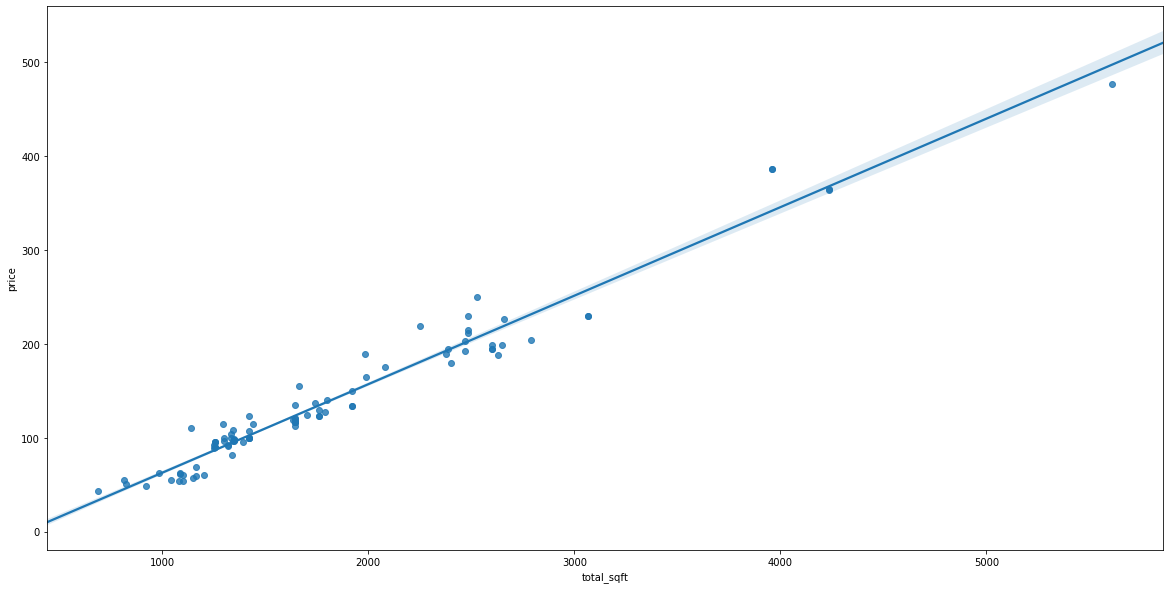

In [110]:
LinearEquationPlot(df7,'Hebbal')

In [73]:
df8.shape

(7295, 246)

In [75]:
## Indipendent features

X = df8.drop(['price'],axis='columns')

X.head()

,total_sqft,bath,balcony,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,1250.0,2,2,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,2,2,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1170.0,2,2,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1425.0,2,2,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,947.0,2,2,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [78]:
## Dependent feature

y = df8.price
y.head()

1    40.0
2    83.0
3    40.0
4    65.0
5    43.0
Name: price, dtype: float64

In [111]:
## Seperate the data for training & testing

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [83]:
## Accuracy rate using LinearRegression algorithm

from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.8386380853371587

In [84]:
## cross validation to measure accuracy of our LinearRegression model

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.83585465, 0.82882783, 0.79869319, 0.85462106, 0.83984832])

In [88]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return round(lr_clf.predict([x])[0],2)

In [89]:
predict_price('Indira Nagar',1000, 2, 2)

186.31

In [92]:
lr_clf.coef_ 

array([ 8.89599301e-02,  1.35572446e+00, -1.46832634e+00, -4.21526771e+00,
       -4.40518848e+01,  9.86517457e+01,  9.76941137e+00, -5.29032179e+01,
        1.24571628e+02, -9.05607464e+01, -4.11723844e+01, -1.68728746e+01,
       -1.57295017e+01, -4.80573657e+01, -4.48906696e+01, -3.34451638e+01,
       -4.68738267e+01, -4.09563268e+01, -2.70221029e+01, -3.07853662e+01,
       -3.04735470e+01, -4.36270703e+01, -4.28227649e+01, -4.38297616e+01,
       -4.29834566e+01, -4.19606810e+01, -3.42942297e+01, -3.30369313e+01,
       -1.09181665e+01,  1.18166290e+01, -3.65268282e+01, -5.13129812e+01,
       -2.84836120e+01, -1.54956985e+01, -2.90323511e+01,  7.22901548e+01,
       -3.21939823e+01, -5.10974333e+01, -8.58949446e+01, -2.78416029e+01,
       -3.11481853e+01, -1.23703940e+01, -2.93068477e+01,  2.95844770e+01,
       -1.06830767e+01, -4.81749387e+01, -5.16206714e+01, -5.40607867e+01,
       -3.04372734e+01,  1.30494156e+02, -4.45782198e+01, -3.17535089e+01,
       -1.85372569e+01,  

In [93]:
lr_clf.intercept_ 

-2.8490091211121324

## Export the tested model to a pickle file

In [90]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [91]:


import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))

